#**Importing required**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/sample_data/income_evaluation.csv")
df.head()


,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()


,0
Age,0
Workclass,0
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
df.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.describe(include = 'O')

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
#df["Income"] = df['Income'].map({"<=50K": 0, ">50K":1})

In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#**Percentage**

In [ ]:
Target_ratio = df["Income"].value_counts()/ len(df['Income'])
print(Target_ratio)

Income
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64


#**Bar plot**

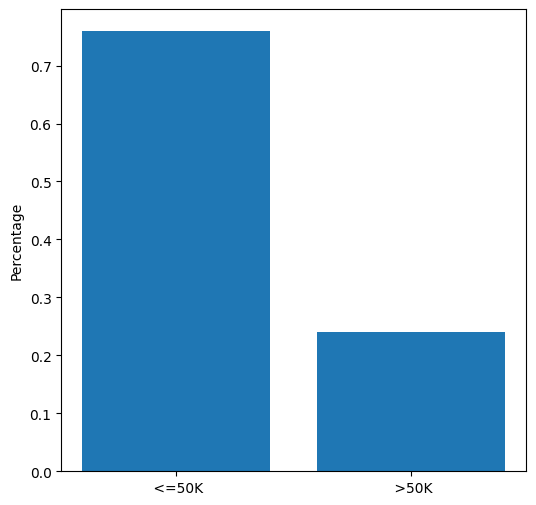

In [ ]:
plt.figure(figsize= (6,6))
plt.bar(Target_ratio.index, Target_ratio)
plt.ylabel("Percentage")
plt.show()

In [ ]:
lb = LabelEncoder()
df['Income'] = lb.fit_transform(df['Income'])
df['Income']

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
lb.classes_

array([' <=50K', ' >50K'], dtype=object)

#**Categorical values converting into numerical values**

In [ ]:
cat_features = df.columns[df.dtypes=='O']
print(*cat_features,sep = ' | ')

Workclass | Education | Marital-status | Occupation | Relationship | Race | Sex | Native-country


In [ ]:
new_data = pd.get_dummies(df, columns = cat_features, dtype = int)
new_data

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
new_data.shape

(32561, 109)

In [ ]:
#new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 109 entries, Age to Native-country_ Yugoslavia
dtypes: int64(109)
memory usage: 27.1 MB


In [ ]:
X = new_data
y = new_data['Income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
pred = gaussian_nb.predict(X_test)
pred_bernouli = bernoulli_nb.predict(X_test )
acc_gnb = accuracy_score(y_test, pred)
acc_bnb = accuracy_score(y_test, pred_bernouli)

print("Gaussian Accuracy score: ",acc_gnb)
print("Bernouli Accuracy score: ", acc_bnb)

Gaussian Accuracy score:  0.799324428066943
Bernouli Accuracy score:  0.9993858436972209


<BarContainer object of 2 artists>

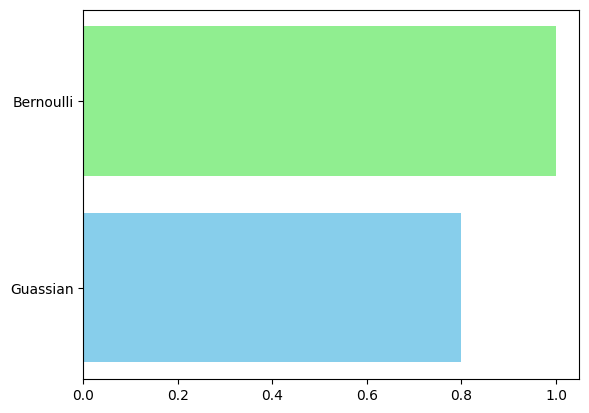

In [ ]:
 plt.barh(["Guassian", "Bernoulli"], [acc_gnb, acc_bnb], color=['skyblue', 'lightgreen'])